#### Задание 

1. Решить задачу классификации на boston house-prices datase (sklearn.datasets.load_boston)
2. Решить задачу регрессии на этом датасете (линейная регрессия и логистическая регрессия это алгоритмы для решения задач регрессии и классификации)
3. Подбирать параметры выбранного алгоритма (вы можете менять критерий разбиения, стратегию разбиения и др)


In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

from sklearn.linear_model import LinearRegression

In [27]:
houses = load_boston()

In [67]:
X = pd.DataFrame(houses.data, columns=houses.feature_names)
y = pd.DataFrame(houses.target, columns=['MEDV'])
df = pd.concat([X,y], axis=1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### Информация об атрибутах (по порядку):

* CRIM - Уровень преступности на душу населения по городам
* ZN - доля земли под жилую застройку зонирована на участки более 25т.кв.футов.
* INDUS - доля акров, не относящихся к розничной торговле, на город
* CHAS - Фиктивная переменная Charles River (= 1, если участок у реки; 0 нет)
* NOX - Концентрация оксидов азота (частей на 10 миллионов)
* RM - Среднее количество комнат в доме
* AGE - доля жилых домов, построенных до 1940 г., занимаемых владельцами
* DIS - взвешенные расстояния до пяти бостонских центров занятости
* RAD - Индекс доступности радиальных автомобильных дорог
* TAX - Ставка налога на имущество в размере полной стоимости за 10т $ США.
* PTRATIO - Соотношение учеников и учителей по городе
* B - 1000 (Bk - 0,63) ^ 2, где Bk - доля черных в городе
* LSTAT - % населения с низкий статусом
* MEDV - Средняя стоимость частных домов в 1000 долларов

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [35]:
# все значения числовые, пропусков нет

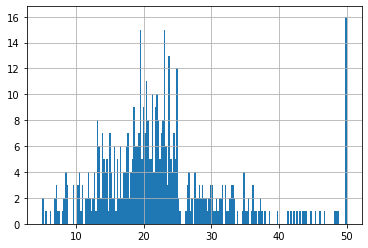

In [68]:
df.MEDV.hist(bins=200)

In [158]:
df.MEDV.value_counts(bins=5)

(14.0, 23.0]     239
(23.0, 32.0]     123
(4.954, 14.0]     77
(32.0, 41.0]      36
(41.0, 50.0]      31
Name: MEDV, dtype: int64

In [163]:
# разделим дома на классы по уровню цен
cond = df.MEDV >= 16
df['MEDV_class'] = np.where(cond, 2, 1)
df.loc[(df.MEDV >= 22), 'MEDV_class'] = 3
df.loc[(df.MEDV >= 26), 'MEDV_class'] = 4
#df.loc[(df.MEDV >= 39), 'MEDV_class'] = 5

In [164]:
df['MEDV_class'].value_counts()

2    167
4    121
1    110
3    108
Name: MEDV_class, dtype: int64

In [117]:
param = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

In [165]:
y = df['MEDV_class']
X = df[param]

([<matplotlib.axis.YTick at 0x7fa20cda2a10>,
 <a list of 13 Text yticklabel objects>)

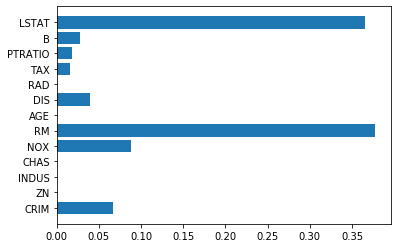

In [276]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X, y)

plt.barh(np.arange(len(clf.feature_importances_)), clf.feature_importances_)
plt.yticks(np.arange(len(X.columns)),X.columns)

In [132]:
# оставим только важные параметры
param_cut = ['RM', 'LSTAT']

In [167]:
X_cut = df[param_cut]
X_cut.head()

,RM,LSTAT
0,6.575,4.98
1,6.421,9.14
2,7.185,4.03
3,6.998,2.94
4,7.147,5.33


In [278]:
crit = ['entropy', 'gini']
crit_r = ['mse', 'friedman_mse', 'mae']
split = ['best', 'random']

In [279]:
def selection_parameters(x, y, crit, split, alg):
    dict_param = {}
    maxim = 0
    q = 0

    for i in range(1, 15):
        for c in crit:
            for s in split:
                if alg == 'clas':
                    clf = DecisionTreeClassifier(max_depth=i, criterion=c, splitter=s)
                else:
                    clf = DecisionTreeRegressor(max_depth=i, criterion=c, splitter=s)
                res = clf.fit(x, y)
                q = res.score(x, y)

                if q > maxim:
                    p = str(i) + ' ' + c + ' ' + s
                    dict_param[p] = q
                    maxim = q
    return dict_param

In [274]:
# определим лучшее сочетание параметров для классификации
selection_parameters(X_cut, y, crit, split, alg='clas')

{'1 entropy best': 0.4525691699604743,
 '1 gini best': 0.5316205533596838,
 '2 entropy best': 0.691699604743083,
 '3 entropy best': 0.7371541501976284,
 '4 entropy best': 0.7490118577075099,
 '4 gini best': 0.7549407114624506,
 '5 entropy best': 0.7786561264822134,
 '5 gini best': 0.7905138339920948,
 '6 entropy best': 0.8122529644268774,
 '6 gini best': 0.8280632411067194,
 '7 entropy best': 0.8537549407114624,
 '8 entropy best': 0.8913043478260869,
 '9 entropy best': 0.9288537549407114,
 '10 entropy best': 0.9525691699604744,
 '11 entropy best': 0.9723320158102767,
 '12 entropy best': 0.9782608695652174,
 '13 entropy best': 0.9881422924901185,
 '14 entropy best': 0.9940711462450593}

In [ ]:
# лучший результат для классификации
clf = DecisionTreeClassifier(max_depth=14, criterion='entropy', splitter='best')

In [288]:
y_ = df['MEDV']

In [287]:
# определим лучшее сочетание параметров для регрессии
selection_parameters(X_cut, y_, crit_r, split, alg='reg')

{'1 mse best': 0.4527442007436526,
 '2 mse best': 0.6955744779730269,
 '3 mse best': 0.7832632934220418,
 '4 mse best': 0.8219430265044271,
 '5 mse best': 0.8553951220111599,
 '6 mse best': 0.8866721360931938,
 '7 mse best': 0.9241142761336096,
 '8 mse best': 0.9476156497991012,
 '9 mse best': 0.9613004015739461,
 '10 mse best': 0.9724109521694657,
 '11 mse best': 0.9815765320721733,
 '12 mse best': 0.9884383312337871,
 '13 mse best': 0.9937118082018785,
 '14 mse best': 0.995822555101722}

In [281]:
# лучший результат для регрессии
clf_r = DecisionTreeRegressor(max_depth=14, criterion='mse', splitter='best')

In [255]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


[Text(169.8746631736527, 210.192, 'X[1] <= 11.675\nentropy = 1.976\nsamples = 506\nvalue = [110, 167, 108, 121]'),
 Text(100.23952095808384, 195.696, 'X[0] <= 6.543\nentropy = 1.572\nsamples = 261\nvalue = [2, 53, 91, 115]'),
 Text(61.64730538922156, 181.2, 'X[0] <= 6.12\nentropy = 1.389\nsamples = 134\nvalue = [2, 52, 70, 10]'),
 Text(38.96811377245509, 166.704, 'X[0] <= 5.166\nentropy = 1.293\nsamples = 58\nvalue = [2, 38, 15, 3]'),
 Text(36.96332335329342, 152.208, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 0, 2]'),
 Text(40.97290419161677, 152.208, 'X[1] <= 11.57\nentropy = 1.164\nsamples = 56\nvalue = [2, 38, 15, 1]'),
 Text(38.96811377245509, 137.712, 'X[0] <= 6.062\nentropy = 1.134\nsamples = 54\nvalue = [2, 38, 13, 1]'),
 Text(29.821257485029943, 123.216, 'X[0] <= 6.02\nentropy = 1.085\nsamples = 44\nvalue = [2, 33, 8, 1]'),
 Text(17.54191616766467, 108.72, 'X[0] <= 5.855\nentropy = 1.074\nsamples = 38\nvalue = [1, 28, 8, 1]'),
 Text(8.019161676646707, 94.22399999999999, 'X[0]

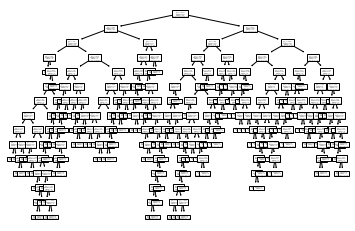

In [263]:
from sklearn import tree
import graphviz
clf_ = DecisionTreeClassifier(max_depth=14, criterion='entropy', splitter='best')
clf_ = clf.fit(X_cut, y)
tree.plot_tree(clf_)


In [93]:
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

In [186]:
def test_clf(clf, X, y, cmap=None, fit_clf=False):
    xx,yy = get_grid(X.values)
    if fit_clf:
        clf.fit(X, y)
    predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.figure(figsize=(10, 10))
    plt.pcolormesh(xx, yy, predicted, cmap=cmap or 'winter')
    plt.scatter(X.values[:, 0], X.values[:, 1], c=list(np.array(y).reshape(1,-1)[0]), s=30, cmap=cmap or 'autumn')
    if fit_clf:
        return clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

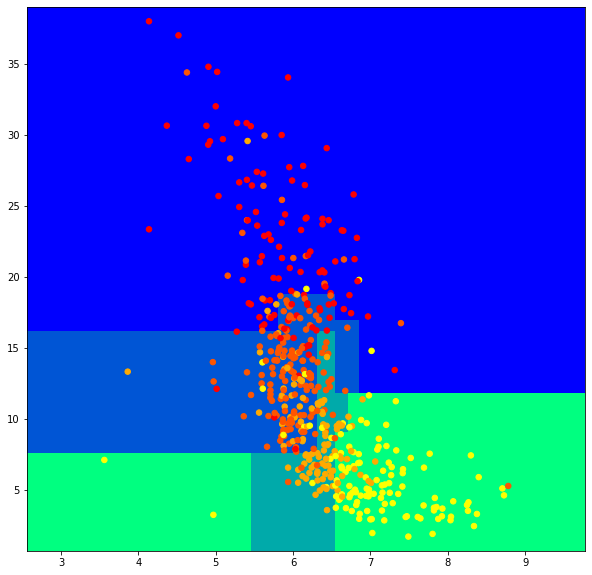

In [285]:
# визуализируем, используя функции с вебинара
test_clf(clf, X_cut, y, fit_clf=True)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=14,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

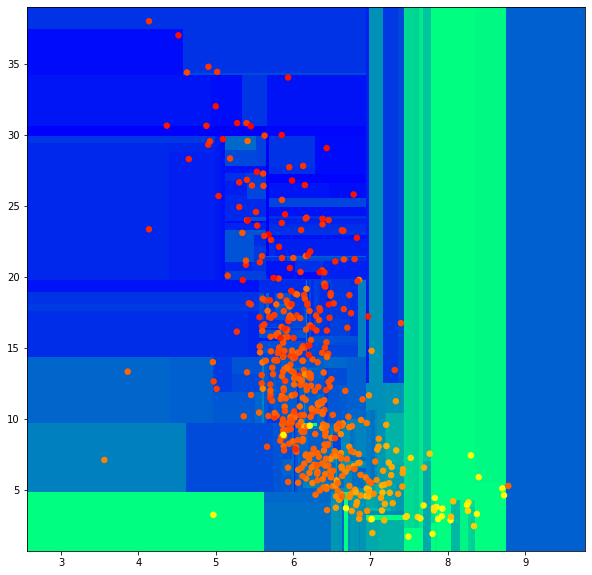

In [286]:
# визуализируем, используя функции с вебинара
test_clf(clf_r, X_cut, y_, fit_clf=True)

In [ ]:
# отличия в пользу классификации